# Simple useage case
## Import Python packages

In [1]:
from IceSystem import IceSystem
import matplotlib.pyplot as plt

## Define shell structure
Starting with a pure ice shell, 10 km thick ($L_z$ or $D$) with a surface temperature of 110 K ($T_\text{surf}$). We will choose a 10 km wide horizontal domain ($L_x$), and assume the basal temperature is water at ~1 atm, 273.15 K ($T_\text{bot}$).

In [2]:
# set ice shell parameters
shell_thickness = 5e3  # m
shell_width = 10e3  # m
surface_temp = 110.  # K
basal_temp = 273.15  # K

We shoud set some numerical parameters as well, choosing 50 m for our spatial discretization size ($\Delta z$ and $\Delta x$).

In [3]:
# spatial step sizes
dz = dx = 50.  # m

# initialize model with chosen parameters
model = IceSystem(Lx=shell_width, Lz=shell_thickness, dx=dx, dz=dz)

This creates our spatial matrices <code>model.X</code> and <code>model.Z</code>. In Python, the default is column first so they have the structure <code>X[z index, x index]</code>.

## Initial temperature profile
We will assume that ice has a temperature-dependent conductivity
$$ k_i = {567 \over T}$$
and initialize the temperature profile to a steady state
$$ T(z) = T_\text{surf}\left( {T_\text{bot} \over T_\text{surf}} \right) ^ {z/D} $$

In [4]:
model.init_T(Tsurf=surface_temp, Tbot=basal_temp)

init_T(Tsurf = 110.0, Tbot = 273.15)
	 Temperature profile initialized to non-linear


Visualizing the initial temperature profile using a heatmap

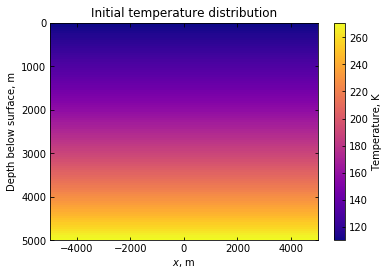

In [5]:
plt.title("Initial temperature distribution")
plt.pcolormesh(model.X, model.Z, model.T, cmap="plasma")
plt.colorbar(label="Temperature, K")
plt.xlabel("$x$, m")
plt.ylabel("Depth below surface, m")
plt.gca().invert_yaxis()
plt.show()

Slice of the 2d array to better visualize the temperature profile,

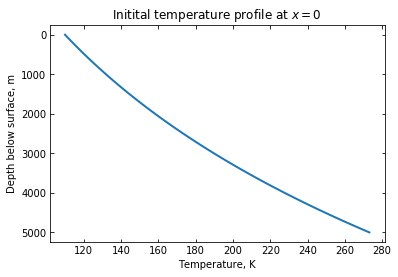

In [6]:
plt.title("Initital temperature profile at $x=0$")
# T[:, 100] = depth-temperature profile at x = 0
plt.plot(model.T[:,100], model.Z[:,100])
plt.xlabel("Temperature, K")
plt.ylabel("Depth below surface, m")
plt.gca().invert_yaxis()
plt.show()

## Initialize a water body
Assuming we have a 250 m thick ($h$) elliptical sill thats emplaced 1 km below the surface ($d$) and is 4.8 km in diameter and the water is at melting temperature (273.15 K) ($T_\text{intrusion}$).

In [7]:
sill_thickness = 250.  # m
sill_depth = 1e3  # m
sill_radius = 2.4e3 # m
sill_temp = 273.15  # K

model.init_intrusion(T=sill_temp, depth=sill_depth, thickness=sill_thickness, radius=sill_radius, geometry='box')

Now, visualizing the temperature field the same way as above, we will see the emplaced sill

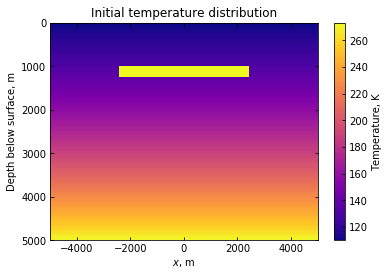

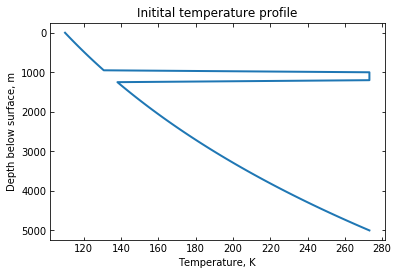

In [8]:
plt.figure()
plt.title("Initial temperature distribution")
plt.pcolormesh(model.X, model.Z, model.T, cmap="plasma")
plt.colorbar(label="Temperature, K")
plt.xlabel("$x$, m")
plt.ylabel("Depth below surface, m")
plt.gca().invert_yaxis()
plt.show()

plt.figure()
plt.title("Initital temperature profile")
# T[:, 100] = depth-temperature profile at x = 0
plt.plot(model.T[:,100], model.Z[:,100])
plt.xlabel("Temperature, K")
plt.ylabel("Depth below surface, m")
plt.gca().invert_yaxis()
plt.show()

We can also see the location of liquids in the shell by using our <code>model.phi</code> matrix, or the thermal diffusivity with <code>model.k/model.rhoc</code>

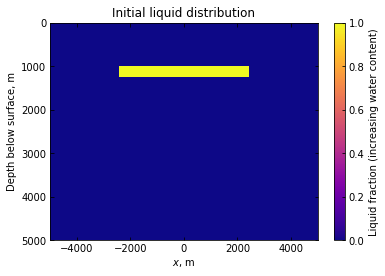

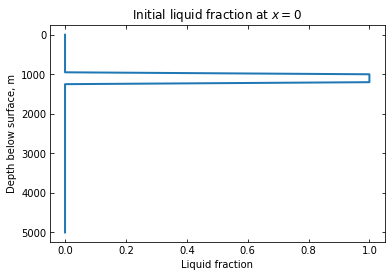

In [9]:
plt.figure()
plt.title("Initial liquid distribution")
plt.pcolormesh(model.X, model.Z, model.phi, cmap="plasma")
plt.colorbar(label="Liquid fraction (increasing water content)")
plt.xlabel("$x$, m")
plt.ylabel("Depth below surface, m")
plt.gca().invert_yaxis()
plt.show()

plt.figure()
plt.title("Initial liquid fraction at $x=0$")
# T[:, 100] = depth-temperature profile at x = 0
plt.plot(model.phi[:,100], model.Z[:,100])
plt.xlabel("Liquid fraction")
plt.ylabel("Depth below surface, m")
plt.gca().invert_yaxis()
plt.show()

## Run a quick simulation
To let the water freeze, we must set the time step size, the boundary conditions, and the length of time to run it. Generally must also choose what outputs and their frequency, but that is addressed later. 

For a two-dimensional diffusion problem, we can determine the maximum step size by
$$ (\Delta t)_\text{max} = {\min(\Delta x, \Delta z)^2 \over 3}{\min(\bar{\rho C}) \over \max(\bar{k})^2} $$
Though, it should usually be less than this for stability, so we'll choose our time step as

In [10]:
dtmax =  min(model.dx, model.dz) ** 2 * model.rhoc.min() / (3 * model.k.max() ** 2)
dt = 0.1 * dtmax

Since the sill is far enough away from the boundaries, we can choose the left and right to be a no flux condition ("insulating") and the bottom to be constant. Let's also assume that the surface is so cold that it will always be constant as well.

In [11]:
# top=True and bottom=True allow constant boundary conditions and are default
model.set_boundaryconditions(top=True, bottom=True, sides='NoFlux')

Finally, we will run it for 200 years and see what happens. 

In [12]:
final_time = 200 * 3.154e7 # s
number_of_time_steps = int(final_time/dt)

model.solve_heat(nt=number_of_time_steps, dt=dt)

Starting simulation with
-------------------------
	 total model time:  6305294051.792338s, 199.9142058272777yr
	   dt = 6068617.951676938 s
	 Ice shell thickness: 5000.0 m
	 Lateral domain size: 10000.0 m
	    dz = 50.0 m;  dx = 50.0 m
	 surface temperature: 110.0 K
	 bottom temperature:  273.15 K
	 boundary conditions:
	    top:     Dirichlet
	    bottom:  Dirichlet
	    sides:   NoFlux
	 sources/sinks:
	    tidal heating:  off
	    latent heat:    on
	 tolerances:
	    temperature:     0.1
	    liquid fraction: 0.01
	 thermal properties:
	    ki(T):    on
	    ci(T):    off
	 intrusion/salt:
	    radius:    2400.0m
	    thickness: 250.0m
	    depth:     1000.0m
	    salinity: off
	 other:
	     stop on freeze: off
-------------------------
no outputs requested


## Visualize results
Now that we've run the simulation for ~200 years, we can see how much has changed!

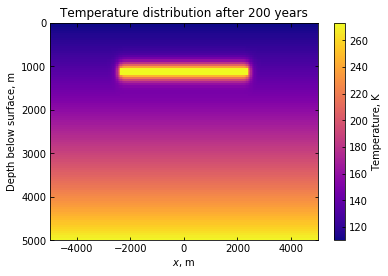

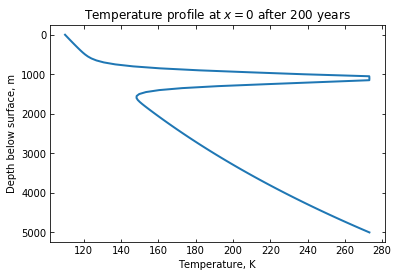

In [13]:
plt.figure()
plt.title("Temperature distribution after 200 years")
plt.pcolormesh(model.X, model.Z, model.T, cmap="plasma")
plt.colorbar(label="Temperature, K")
plt.xlabel("$x$, m")
plt.ylabel("Depth below surface, m")
plt.gca().invert_yaxis()
plt.show()

plt.figure()
plt.title("Temperature profile at $x=0$ after 200 years")
# T[:, 1] = depth-temperature profile at x = 0
plt.plot(model.T[:,100], model.Z[:,100])
plt.xlabel("Temperature, K")
plt.ylabel("Depth below surface, m")
plt.gca().invert_yaxis()
plt.show()

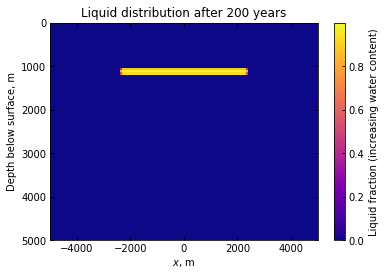

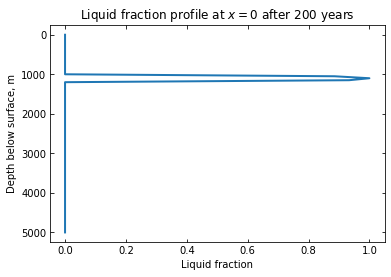

In [14]:
plt.figure()
plt.title("Liquid distribution after 200 years")
plt.pcolormesh(model.X, model.Z, model.phi, cmap="plasma")
plt.colorbar(label="Liquid fraction (increasing water content)")
plt.xlabel("$x$, m")
plt.ylabel("Depth below surface, m")
plt.gca().invert_yaxis()
plt.show()

plt.figure()
plt.title("Liquid fraction profile at $x=0$ after 200 years")
# T[:, 1] = depth-temperature profile at x = 0
plt.plot(model.phi[:,100], model.Z[:,100])
plt.xlabel("Liquid fraction")
plt.ylabel("Depth below surface, m")
plt.gca().invert_yaxis()
plt.show()

## Keep going!
The simulation can continue for as long as desired!

In [15]:
model.solve_heat(nt=number_of_time_steps*2, dt=dt)

Starting simulation with
-------------------------
	 total model time:  12610588103.584677s, 399.8284116545554yr
	   dt = 6068617.951676938 s
	 Ice shell thickness: 5000.0 m
	 Lateral domain size: 10000.0 m
	    dz = 50.0 m;  dx = 50.0 m
	 surface temperature: 110.0 K
	 bottom temperature:  273.15 K
	 boundary conditions:
	    top:     Dirichlet
	    bottom:  Dirichlet
	    sides:   NoFlux
	 sources/sinks:
	    tidal heating:  off
	    latent heat:    on
	 tolerances:
	    temperature:     0.1
	    liquid fraction: 0.01
	 thermal properties:
	    ki(T):    on
	    ci(T):    off
	 intrusion/salt:
	    radius:    2400.0m
	    thickness: 250.0m
	    depth:     1000.0m
	    salinity: off
	 other:
	     stop on freeze: off
-------------------------
no outputs requested


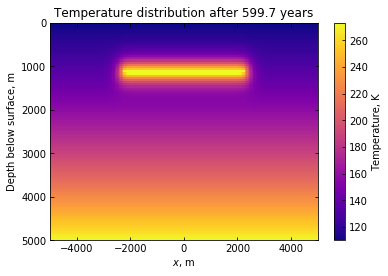

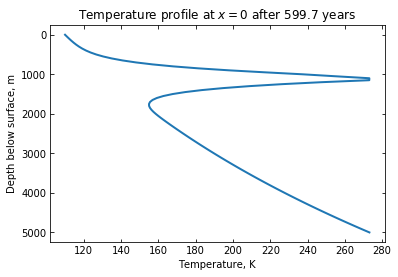

In [16]:
years_passed = model.model_time/3.154e7
plt.figure()
plt.title("Temperature distribution after {:0.01f} years".format(years_passed))
plt.pcolormesh(model.X, model.Z, model.T, cmap="plasma")
plt.colorbar(label="Temperature, K")
plt.xlabel("$x$, m")
plt.ylabel("Depth below surface, m")
plt.gca().invert_yaxis()
plt.show()

plt.figure()
plt.title("Temperature profile at $x=0$ after {:0.01f} years".format(years_passed))
# T[:, 1] = depth-temperature profile at x = 0
plt.plot(model.T[:,100], model.Z[:,100])
plt.xlabel("Temperature, K")
plt.ylabel("Depth below surface, m")
plt.gca().invert_yaxis()
plt.show()

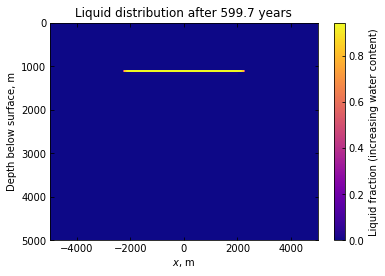

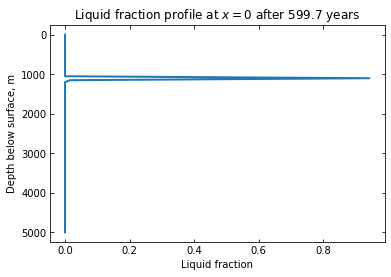

In [17]:
plt.figure()
plt.title("Liquid distribution after {:0.01f} years".format(years_passed))
plt.pcolormesh(model.X, model.Z, model.phi, cmap="plasma")
plt.colorbar(label="Liquid fraction (increasing water content)")
plt.xlabel("$x$, m")
plt.ylabel("Depth below surface, m")
plt.gca().invert_yaxis()
plt.show()

plt.figure()
plt.title("Liquid fraction profile at $x=0$ after {:0.01f} years".format(years_passed))
# T[:, 1] = depth-temperature profile at x = 0
plt.plot(model.phi[:,100], model.Z[:,100])
plt.xlabel("Liquid fraction")
plt.ylabel("Depth below surface, m")
plt.gca().invert_yaxis()
plt.show()

We can also make sure to stop the simulation right as all the liquid is gone with

In [18]:
model.freezestop = 1
model.solve_heat(nt=number_of_time_steps*2, dt=dt)

Starting simulation with
-------------------------
	 total model time:  12610588103.584677s, 399.8284116545554yr
	   dt = 6068617.951676938 s
	 Ice shell thickness: 5000.0 m
	 Lateral domain size: 10000.0 m
	    dz = 50.0 m;  dx = 50.0 m
	 surface temperature: 110.0 K
	 bottom temperature:  273.15 K
	 boundary conditions:
	    top:     Dirichlet
	    bottom:  Dirichlet
	    sides:   NoFlux
	 sources/sinks:
	    tidal heating:  off
	    latent heat:    on
	 tolerances:
	    temperature:     0.1
	    liquid fraction: 0.01
	 thermal properties:
	    ki(T):    on
	    ci(T):    off
	 intrusion/salt:
	    radius:    2400.0m
	    thickness: 250.0m
	    depth:     1000.0m
	    salinity: off
	 other:
	     stop on freeze: on
-------------------------
no outputs requested
instrusion frozen at 29784776906.8280s


29784776906.82802

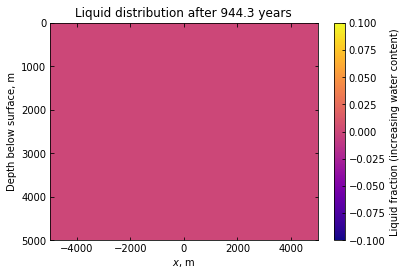

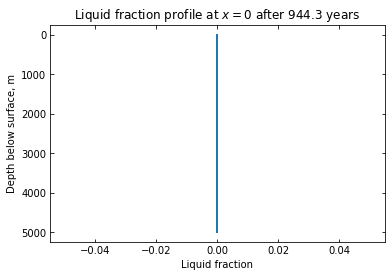

In [19]:
years_passed = model.model_time/3.154e7
plt.figure()
plt.title("Liquid distribution after {:0.01f} years".format(years_passed))
plt.pcolormesh(model.X, model.Z, model.phi, cmap="plasma")
plt.colorbar(label="Liquid fraction (increasing water content)")
plt.xlabel("$x$, m")
plt.ylabel("Depth below surface, m")
plt.gca().invert_yaxis()
plt.show()

plt.figure()
plt.title("Liquid fraction profile at $x=0$ after {:0.01f} years".format(years_passed))
# T[:, 1] = depth-temperature profile at x = 0
plt.plot(model.phi[:,100], model.Z[:,100])
plt.xlabel("Liquid fraction")
plt.ylabel("Depth below surface, m")
plt.gca().invert_yaxis()
plt.show()